# FBPlots.jl 

Data visualization tools for football event data. This notebook serves as a demonstration of the capabilities of the library functions in use here. 

In [1]:
include("../data-visualization/FBPlots.jl")

## Drawing a football pitch

As per the [Statsbomb](https://github.com/statsbomb/open-data/tree/master/doc) data format, the pitch dimensions are defined as follows -

- The full pitch is 120 x 80 yards, goals at [(0, 36)-(0,44)], [(120, 36)-(120, 44)]
- Penalty spots at (12, 40), (108, 40)
- The box D's are defined by a circle of radius 12 centered at the penalty spots
- The 18-yard box(es) is a rectangle with corner points: [(0, 18), (0, 62), (18, 62), (18, 18)],
                                                     [(120, 18), (120, 62), (102, 62), (102, 18)]
- The 6-yard box(es) is a rectangle with corner points: [(0, 26), (0, 38), (6, 38), (6, 26)],
                                                     [(120, 26), (120, 38), (114, 38), (114, 26)]
                                                     
FBPlots.jl provides functionality for drawing the pitch geometries, and can be used as follows.

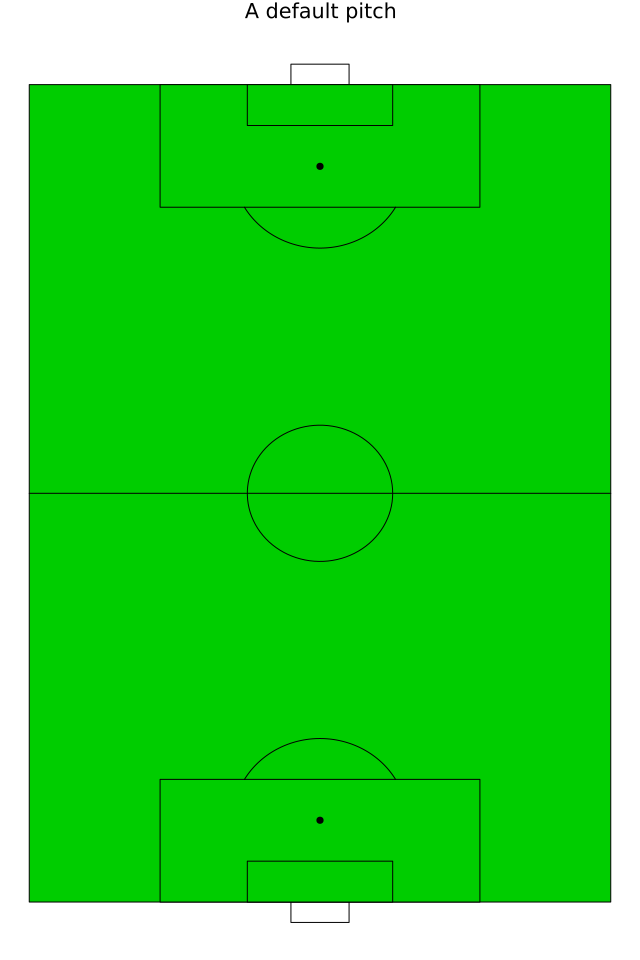

In [2]:
p = get_default_pitch(scale=4, title="A default pitch")
p

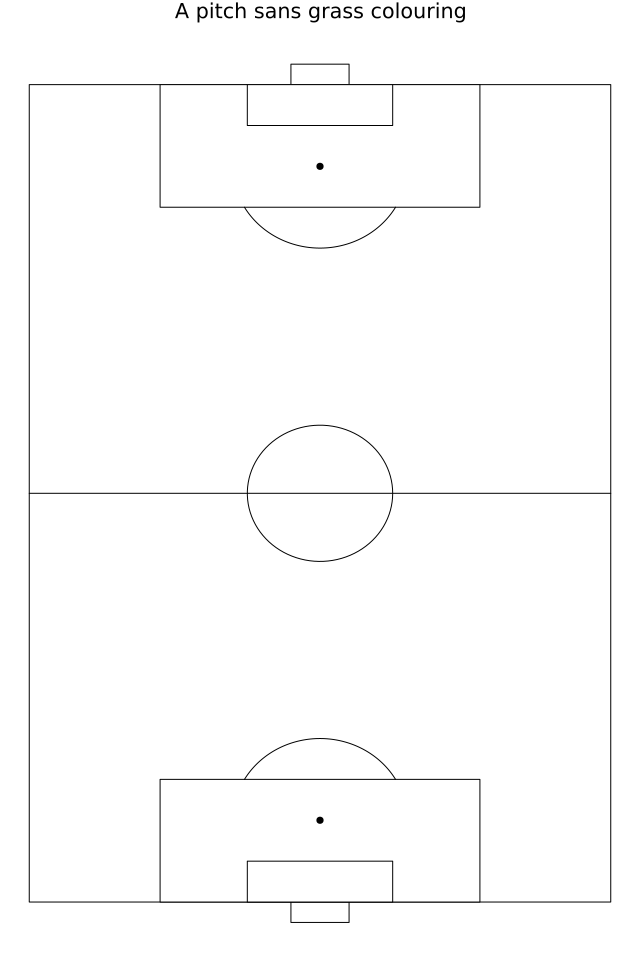

In [3]:
# With a white grass colour so that we can plot locations / lines more easily
p = get_default_pitch(scale=4, title="A pitch sans grass colouring",
                      border_col="white", grass_col="white", line_col="black")
p

### Half a pitch

For shot data and relevant visualizations, the Statsbomb data format defines all locations relative to just the goal on the far side ([(120, 36)-(120,44)]). In order to make nicer plots for those purposes, we also have a method to generate half a pitch.

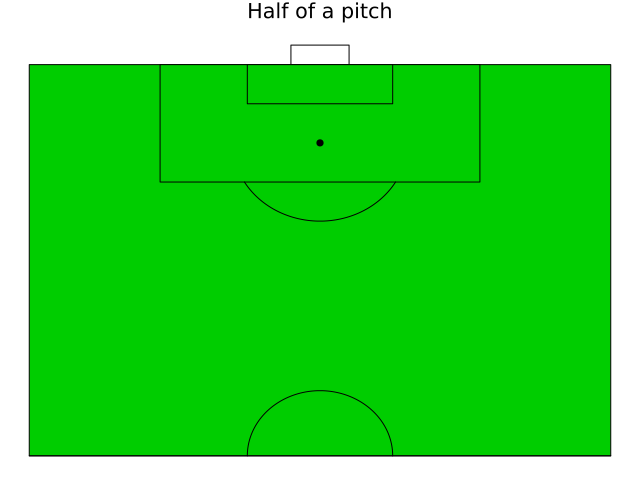

In [4]:
p = get_half_pitch(scale=4, title="Half of a pitch",
                      border_col="white", grass_col="green3", line_col="black")
p

## Plotting player / ball locations

In order to ensure compatibility on both the full pitch and half pitch, we wrap a function to plot a single location or a list of locations on a scatter plot. 

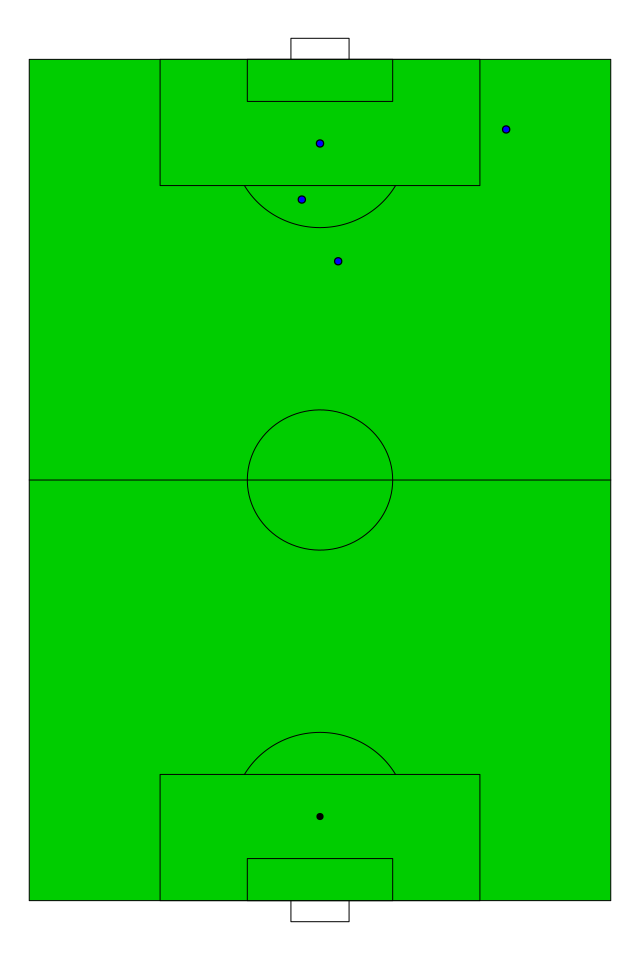

In [5]:
p = get_default_pitch(scale=4)
plot_location!(p, [100, 37.5], half_pitch=false)
plot_location!(p, [91.2, 42.5], half_pitch=false)
plot_location!(p, [110, 65.61], half_pitch=false)
plot_location!(p, [108, 40], half_pitch=false)

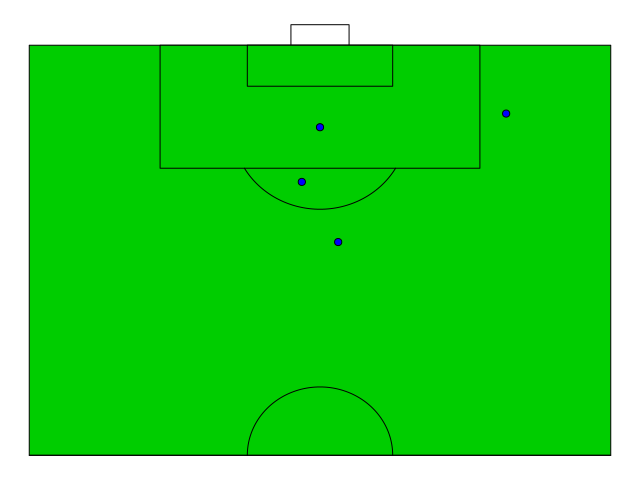

In [6]:
p = get_half_pitch(scale=4)
plot_location!(p, [100, 37.5])
plot_location!(p, [91.2, 42.5])
plot_location!(p, [110, 65.61])
plot_location!(p, [108, 40])

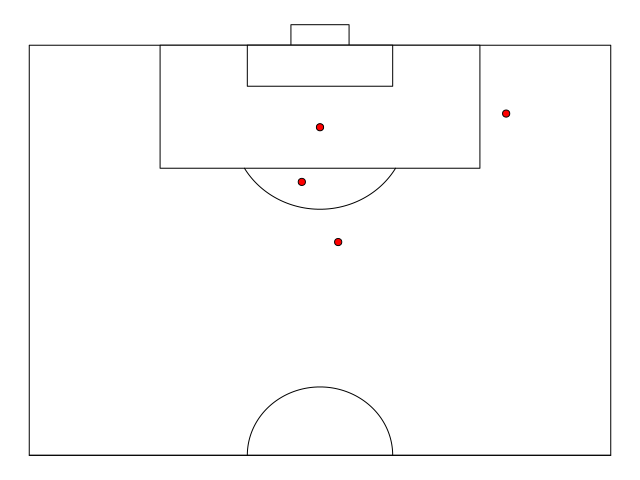

In [7]:
p = get_half_pitch(scale=4, grass_col="white")
n_locs = 4
# TODO: Find a better way to initialize a Matrix?
locations = zeros(Float32, n_locs, 2)
locations[1, :] = [100, 37.5]
locations[2, :] = [91.2, 42.5]
locations[3, :] = [110, 65.61]
locations[4, :] = [108, 40]
plot_locations!(p, locations, markercolor="red1")

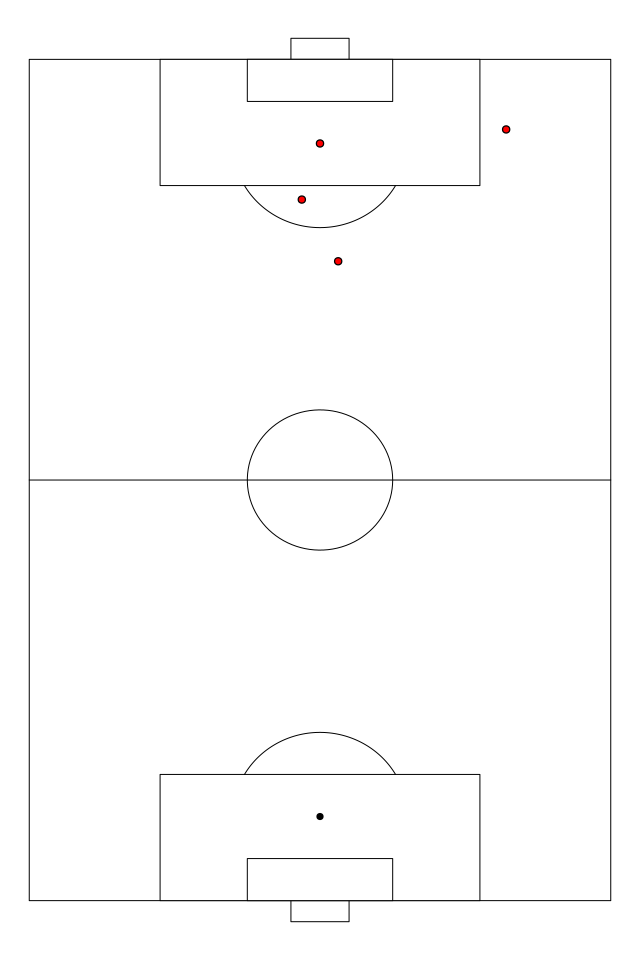

In [8]:
p = get_default_pitch(scale=4, grass_col="white")
n_locs = 4
locations = zeros(Float32, n_locs, 2)
locations[1, :] = [100, 37.5]
locations[2, :] = [91.2, 42.5]
locations[3, :] = [110, 65.61]
locations[4, :] = [108, 40]
plot_locations!(p, locations, half_pitch=false, markercolor="red1")

## Plotting lines

As above, we may choose to draw a line between two locations on the pitch to represent carry, pass, or shot. FBPlots has useful wrappers to do that.

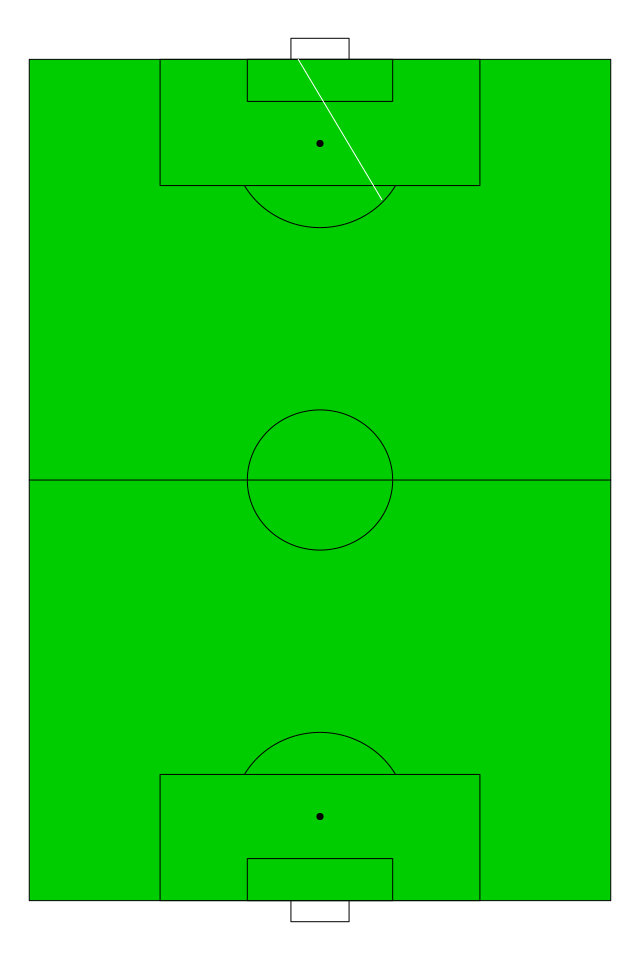

In [9]:
p = get_default_pitch(scale=4)
locations = zeros(Float32, 2, 2)
locations[1, :] = [100, 48.5]
locations[2, :] = [120, 37]
plot_line!(p, locations, half_pitch=false)

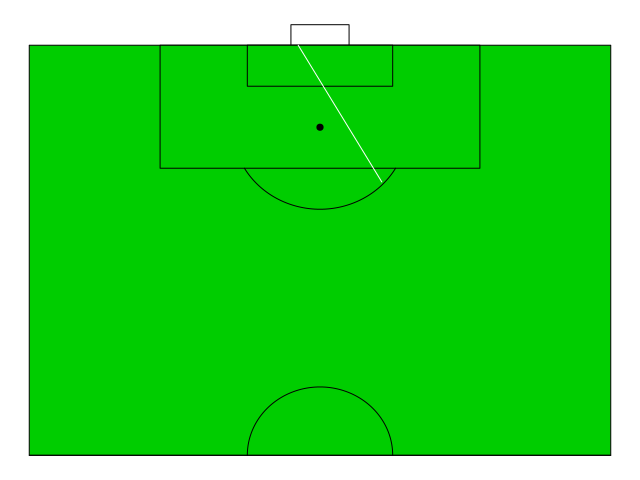

In [10]:
p = get_half_pitch(scale=4)
locations = zeros(Float32, 2, 2)
locations[1, :] = [100, 48.5]
locations[2, :] = [120, 37]
plot_line!(p, locations)

## More general functionality

FBPlots' ```get_default_pitch()``` and ```get_half_pitch()``` methods return a Plots.Plot object which can then be used at the user's discretion. For example, one might want to highlight different zones of the pitch in accordance with positional play philosophies, or simply denote the final 3rd in a different colour to designate its importance.

There's also a helpful ```rectangle(width, height, y, x)```function that takes in the x and y coordinates for a corner point and returns the rectangle as a Plots.Shape that can be used as follows.

**Note**: Without using the wrappers, you will have to manually translate coordinates for use on the half pitch. The half pitch covers global coordinates [(60, 0), (120, 0), (120, 80), (60, 80)], mapping them onto
corner points [(0, 0), (60, 0), (60, 80), (0, 80)].

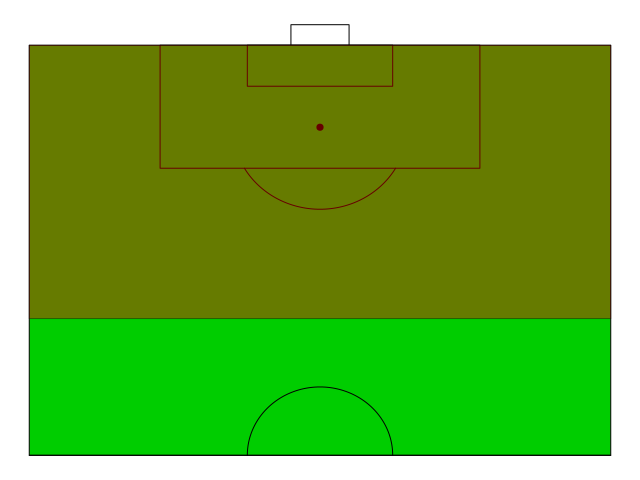

In [11]:
p = get_half_pitch(scale=4)
plot!(p, rectangle(MAX_Y, -MAX_X_HALF_PITCH * 2/3, 0, MAX_X_HALF_PITCH), opacity=0.4,
    fillcolor="red1")

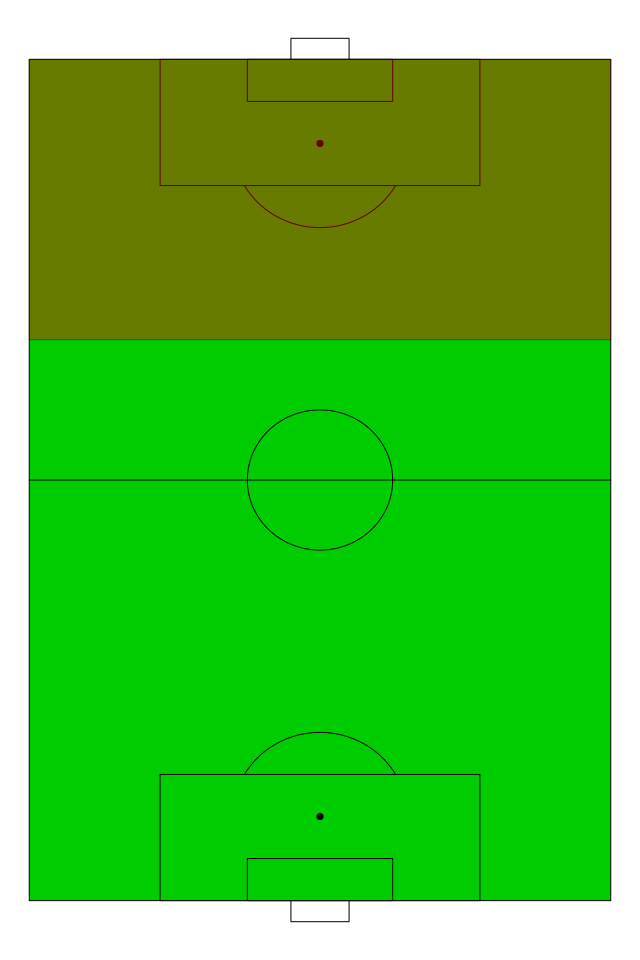

In [12]:
p = get_default_pitch(scale=4)
plot!(p, rectangle(MAX_Y, -MAX_X * 1/3, 0, MAX_X), opacity=0.4,
    fillcolor="red1")